

Importing data with fields:
﻿Pit,BVit,Eit
There are 45 entries.


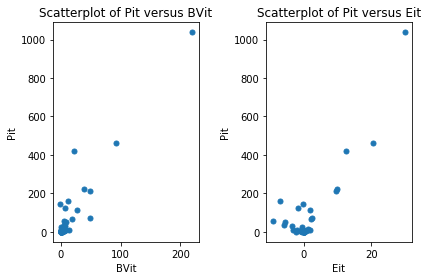

Using both BVit and Eit as predictors:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sat, 02 Jun 2018   Prob (F-statistic):           1.15e-20
Time:                        09:32:13   Log-Likelihood:                -247.46
No. Observations:                  45   AIC:                             500.9
Df Residuals:                      42   BIC:                             506.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def import_csv(name, delimiter):
    with open(name, 'r') as file:
        data_reader = csv.reader(file, delimiter=delimiter)

        # importing the header line separately
        # and printing it to screen
        header = next(data_reader)
        print("\n\nImporting data with fields:\n" + ",".join(header))

        # creating an empty list to store each row of data
        data = []

        for row in data_reader:
            # for each row of data
            # converting each element (from string) to float type
            row_of_floats = list(map(float, row))

            # now storing in our data list
            data.append(row_of_floats)

        print("There are %d entries." % len(data))

        # converting the data (list object) into a numpy array
        data_as_array = np.array(data)

        n = data_as_array.shape[1]
        # deleting the last column (quality) from inputs
        inputs = np.delete(data_as_array, 0, 1)
        # assigning it as targets instead
        targets = data_as_array[:, 0]

        # returning this array to caller
        return header, inputs, targets

    
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


# importing using csv reader and storing as numpy array
header, inputs, targets = import_csv('data_t1.csv',',')

# separating the variables based on the columns of the data
bvit = inputs[:, 0]
eit = inputs[:, 1]

# y coordinates / targets
pit = targets

# plotting
fig = plt.figure(1)
ax = fig.add_subplot(121)
ax.plot(bvit, pit, 'o', markersize=5)
plt.xlabel('BVit')
plt.ylabel('Pit')
plt.title('Scatterplot of Pit versus BVit')


ax = fig.add_subplot(122)
ax.plot(eit, pit, 'o', markersize=5)
plt.xlabel('Eit')
plt.ylabel('Pit')
plt.title('Scatterplot of Pit versus Eit')
fig.tight_layout()
plt.show()

from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm


print(color.BOLD + "Using both BVit and Eit as predictors:\n" + color.END)
X = inputs
y = targets
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()
Rt = results.rsquared
print(results.summary())
print("\n")
print("Rt squared: " + str(Rt) + "\n")
print("\n")

print(color.BOLD + "Using only Eit as predictor:\n" + color.END)
eit = sm.add_constant(eit)
results = sm.OLS(y, eit).fit()
R2 = results.rsquared
print(results.summary())
print("\n")
print("Reit squared: " + str(R2) + "\n")
print("\n")

print(color.BOLD + "Using only BVit as predictor:\n" + color.END)
bvit = sm.add_constant(bvit)
results = sm.OLS(y, bvit).fit()
R3 = results.rsquared
print(results.summary())
print("\n")
print("Rbvit squared: " + str(R3) + "\n")
print("\n")


print(color.BOLD + "R squared combined - R squared BVit = " + str(Rt - R3) + "\n" + color.END)
# t0 4.12%
# t1 1.25%
# value relevance of earnings is more prominent before the new standard
